In [2]:
import pandas as pd

In [3]:
import math

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import tpot

In [4]:
mean = pd.read_pickle("../dataset_means_stds/decomp_mean.pkl")
std = pd.read_pickle("../dataset_means_stds/decomp_std.pkl")
data_train_scaled = pd.read_csv("../scaled_featurized_train/scaled_decomp_train.csv", index_col=0).dropna(axis=1)
data_test_scaled = pd.read_csv("../scaled_featurized_test/scaled_decomp_test.csv", index_col=0).dropna(axis=1)
data_train = (data_train_scaled * std) + mean
data_test = (data_test_scaled * std) + mean

In [7]:
data_train

,ave:Polarizability,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_affinity,ave:electron_negativity,...,sine_eigenspectrum_37,sine_eigenspectrum_38,sine_eigenspectrum_39,sine_eigenspectrum_4,sine_eigenspectrum_5,sine_eigenspectrum_6,sine_eigenspectrum_7,sine_eigenspectrum_8,sine_eigenspectrum_9,sum:gs_energy
928,16.057320,28.611595,32.035171,2983.626676,109.534171,1290.075194,0.644162,109.796130,0.252482,-1.896283,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-76.647879
3785,2.831019,16.781444,61.431742,780.176807,16.552985,258.614145,3.073329,19.293324,1.463752,2.859557,...,2.576425,2.531734,NaN,1109.427639,1025.410441,794.165202,742.228266,437.112205,401.361068,-41.990552
224,3.749097,9.498256,-0.166373,1711.021843,50.589466,245.037238,0.052438,24.234863,0.506651,0.398783,...,2.576425,2.531734,NaN,1053.589801,997.488779,768.077076,711.720526,471.837138,436.821962,-15.763842
1858,-0.073761,16.942399,-11.534327,-415.630083,12.266860,78.710027,-1.105522,1.437793,-0.968247,4.201798,...,2.576425,2.531734,NaN,1089.566538,1033.016871,795.194762,744.182047,504.344709,470.595610,80.349162
1270,-2.010750,19.960294,-20.779618,-976.321113,40.478740,9.234449,-1.844723,-16.348678,2.796956,8.849926,...,2.576425,2.531734,NaN,939.041285,895.964830,676.025696,630.751486,415.763851,385.541027,-60.296041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,10.644073,-5.859479,26.291006,3640.177860,140.246420,685.310197,4.947064,88.817608,0.454700,-0.090058,...,2.576425,2.531734,NaN,1064.537908,1013.531864,669.794518,624.849264,415.763851,385.541027,-40.155926
3276,5.857255,7.594661,-11.899087,120.555389,63.597553,342.178328,-0.578502,38.544786,0.732278,3.792625,...,2.576425,2.531734,NaN,937.710620,891.622448,691.570967,644.420274,430.080108,380.641564,-18.393537
1318,28.474202,52.486501,110.410334,3221.924382,249.959918,2408.688403,6.889135,196.441876,-0.821774,-2.840822,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-78.870205
723,5.541989,-0.091945,25.702459,2701.413258,47.141121,423.671888,2.457450,36.962140,0.292437,-0.206054,...,2.576425,2.531734,NaN,1976.837840,1867.343740,1500.636946,1414.155272,1036.621790,476.635353,23.380154


In [6]:
data_test

,ave:Polarizability,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_affinity,ave:electron_negativity,...,sine_eigenspectrum_37,sine_eigenspectrum_38,sine_eigenspectrum_39,sine_eigenspectrum_4,sine_eigenspectrum_5,sine_eigenspectrum_6,sine_eigenspectrum_7,sine_eigenspectrum_8,sine_eigenspectrum_9,sum:gs_energy
854,6.668102,26.800857,238.643127,1543.440913,48.086635,490.007469,12.742659,44.538143,0.720702,-0.520900,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-78.627821
1980,24.918054,55.839719,65.942490,2097.587075,0.254761,1666.538038,2.216633,170.966860,-0.914708,-3.056243,...,2.576425,2.531734,NaN,1190.506703,1124.147951,669.794518,624.849264,415.763851,385.541027,-72.588093
3075,4.406985,21.529600,134.584255,851.189048,37.741602,385.554183,7.264198,28.838781,1.388262,0.831283,...,2.576425,2.531734,NaN,3838.897167,3592.146816,1479.575097,1343.700385,978.179478,921.286111,-47.705588
740,39.883509,64.558083,142.751785,3013.339607,68.776702,3881.203622,5.924169,280.187153,-1.011485,-3.702507,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-78.512286
142,4.134347,2.858886,70.595398,1730.475494,47.836352,237.965932,7.717550,35.890450,1.763150,1.442748,...,2.576425,2.531734,NaN,1093.989209,1028.477587,798.515253,744.056504,415.763851,385.541027,-59.321346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,4.415875,1.148745,34.515394,1973.824398,57.187410,247.562704,4.927340,32.590975,1.288542,1.256325,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-73.912978
232,2.628017,16.137626,130.341078,687.958090,43.748095,268.024032,6.671380,16.076034,-0.529693,1.492460,...,2.576425,2.531734,NaN,903.195530,862.625443,669.794518,624.849264,415.763851,385.541027,-75.035772
2423,7.123204,21.196194,157.491059,2630.297480,118.880987,590.015935,9.745020,47.289533,1.620737,0.388130,...,2.576425,2.531734,NaN,3835.859004,3600.004537,2922.539554,2744.326410,2056.899986,1953.895111,-19.338079
2720,3.052685,8.224034,99.825501,1461.031505,90.745992,248.909620,10.348450,20.449419,1.806068,2.345860,...,2.576425,2.531734,NaN,1177.338416,1042.371159,811.118475,758.692449,492.038682,458.696698,-32.167121


In [4]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=1/60,
    max_time_mins=10,
    cv=10,
    verbosity=2,
    scoring="neg_root_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=-1,
    random_state=1234
)

In [5]:
target = "decomposition_energy (eV/atom)"
train_x = data_train_scaled.drop(columns=[target]).to_numpy()
train_y = data_train_scaled[target].to_numpy().ravel()

test_x = data_test_scaled.drop(columns=[target]).to_numpy()
test_y = data_test_scaled[target].to_numpy().ravel()

model.fit(train_x, train_y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.7592034937084879

Generation 2 - Current best internal CV score: -0.7592034937084879

Generation 3 - Current best internal CV score: -0.75629594538494

Generation 4 - Current best internal CV score: -0.75629594538494

Generation 5 - Current best internal CV score: -0.75629594538494

Generation 6 - Current best internal CV score: -0.7512191178377883

Generation 7 - Current best internal CV score: -0.7472133978060935

Generation 8 - Current best internal CV score: -0.7449697574735377

Generation 9 - Current best internal CV score: -0.735770787427029

Generation 10 - Current best internal CV score: -0.735770787427029

Generation 11 - Current best internal CV score: -0.735770787427029

Generation 12 - Current best internal CV score: -0.735770787427029

Generation 13 - Current best internal CV score: -0.7297285399809211

Generation 14 - Current best internal CV score: -0.7259688808712002

Generation 15 - Current best internal CV score: -0.7

TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [6]:
def unscale(arr):
    return arr * std[target] + mean[target]
    
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [7]:
models = {}

models["r1_1term"] = lambda df: -7.517588190691672e-03 + 3.019120658205411e-01 * (df["ave:fusion_enthalpy"] - df["ave:electron_affinity"])
models["r1_2term"] = lambda df: -4.220354429619663e-01 + 3.043650335588696e-01 * np.exp(df["sum:gs_energy"]) + \
                                 3.290126411913264e-01 * (df["ave:fusion_enthalpy"] - df["ave:electron_affinity"])
models["r2_1term"] = lambda df: -4.730850253495772e-01 + 3.491171896552910e-01 * (np.exp(df["sum:gs_energy"]) + (df["ave:fusion_enthalpy"] - df["ave:electron_affinity"]))

data_train_scaled_sisso = data_train_scaled.copy()
data_test_scaled_sisso = data_test_scaled.copy()
for key,fun in models.items():
    data_train_scaled_sisso[key] = fun(data_train_scaled_sisso)
    data_test_scaled_sisso[key] = fun(data_test_scaled_sisso)

data_train_scaled_sisso.head()

,decomposition_energy (eV/atom),ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,...,sine_eigenspectrum_32,sine_eigenspectrum_33,sine_eigenspectrum_34,sine_eigenspectrum_35,sine_eigenspectrum_36,sine_eigenspectrum_37,sine_eigenspectrum_38,r1_1term,r1_2term,r2_1term
928,3.778820,0.763902,-0.536544,1.076964,0.742926,1.636752,-0.858097,1.495475,-1.770993,-0.843908,...,-0.049596,-0.049425,-0.045102,-0.044283,-0.036848,-0.036802,-0.036352,0.868116,1.220841,1.329354
3785,-0.647587,0.034574,-0.111261,-0.456903,-0.736606,-0.471425,-0.322975,-0.561496,0.162642,-0.095065,...,-0.049596,-0.049425,-0.045102,-0.044283,-0.036848,-0.036802,-0.036352,-0.049019,-0.164372,-0.173650
224,-0.704323,-0.414433,-1.002407,0.191078,-0.195012,-0.499175,-0.988448,-0.449184,-0.837862,-0.686773,...,-0.049596,-0.049425,-0.045102,-0.044283,-0.036848,-0.036802,-0.036352,0.780809,0.599739,0.625105
1858,1.134668,0.044497,-1.166868,-1.289329,-0.804808,-0.839127,-1.243536,-0.967321,0.708372,-1.598599,...,-0.049596,-0.049425,-0.045102,-0.044283,-0.036848,-0.036802,-0.036352,0.212284,-0.165828,-0.199788
1270,-0.715637,0.230550,-1.300621,-1.679637,-0.355896,-0.981126,-1.406375,-1.371577,2.598215,0.729161,...,-0.049596,-0.049425,-0.045102,-0.044283,-0.036848,-0.036802,-0.036352,-0.509682,-0.501870,-0.517634


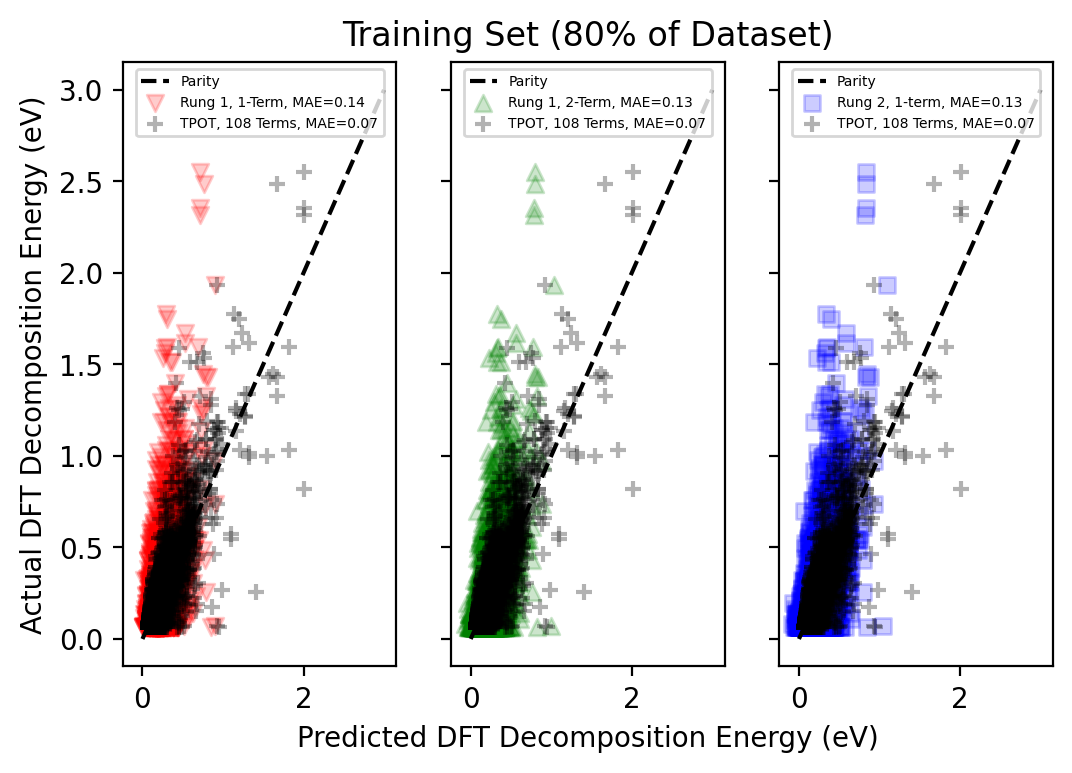

In [9]:
tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(train_pred_y)),2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_1term"])),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_2term"])),2)
r2_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("Actual DFT Decomposition Energy (eV)")
ax2.set_xlabel("Predicted DFT Decomposition Energy (eV)")


    
ax1.scatter(x=unscale(data_train_scaled_sisso["r1_1term"]), y=unscale(train_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mae}")
ax2.scatter(x=unscale(data_train_scaled_sisso["r1_2term"]), y=unscale(train_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mae}")
ax3.scatter(x=unscale(data_train_scaled_sisso["r2_1term"]), y=unscale(train_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mae}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(train_pred_y), y=unscale(train_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mae}")
    ax.plot([0, 3], [0, 3], color="black", linestyle="--", label="Parity")
    
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

ax2.set_title("Training Set (80% of Dataset)")
plt.show()

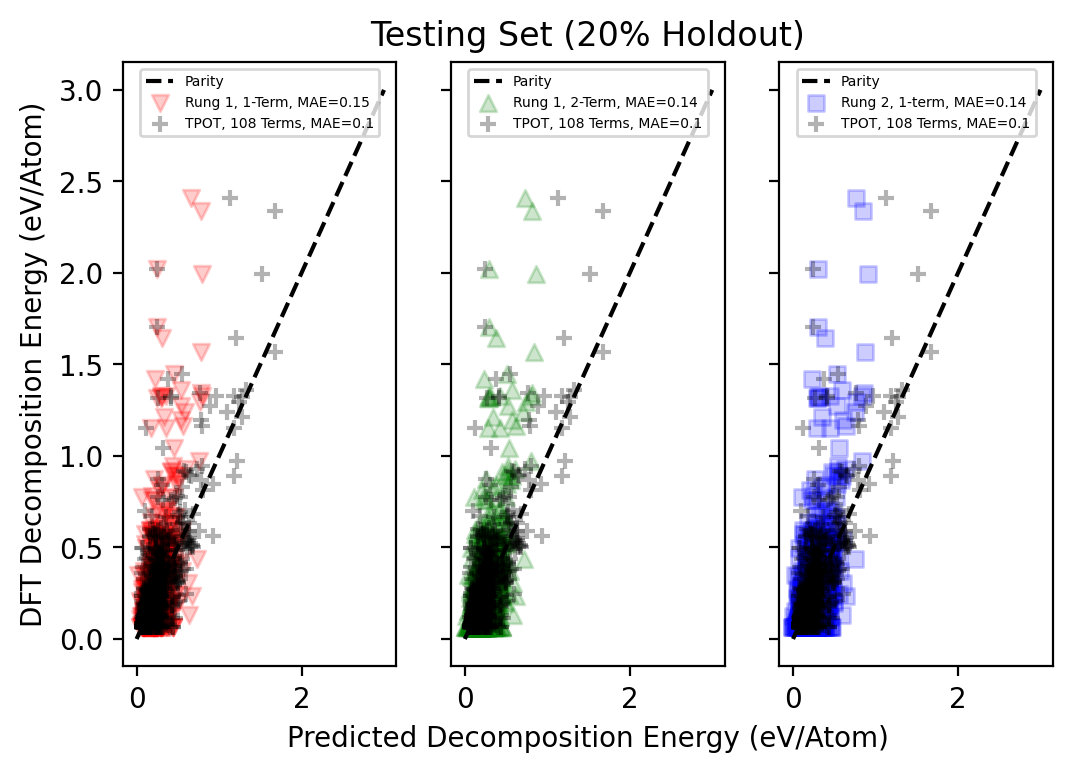

In [10]:
tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(test_pred_y)),2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_1term"])),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_2term"])),2)
r2_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("DFT Decomposition Energy (eV/Atom)")
ax2.set_xlabel("Predicted Decomposition Energy (eV/Atom)")
 
ax1.scatter(x=unscale(data_test_scaled_sisso["r1_1term"]), y=unscale(test_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mae}")
ax2.scatter(x=unscale(data_test_scaled_sisso["r1_2term"]), y=unscale(test_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mae}")
ax3.scatter(x=unscale(data_test_scaled_sisso["r2_1term"]), y=unscale(test_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mae}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(test_pred_y), y=unscale(test_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mae}")
    ax.plot([0, 3], [0, 3], color="black", linestyle="--", label="Parity")

ax2.set_title("Testing Set (20% Holdout)")
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

plt.show()

In [12]:
sum(model.fitted_pipeline_[0].get_support())

33